### Exploratory Data Analysis: American Airlines Fianacial Information 2000 - 2019

#### Data Loading
- Import required libraries.
- Load the dataset.
- Display the first few rows.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker

The data transformation process, including cleaning, handling missing values, deduplication and restructuring, was performed using SQL. 
- Replacing non-numeric values with 0 as most of the columns are financial related columns with numeric values
- Rev_TOTAL_CHARTER, Rev_TOTAL_MISC_REV, Rev_TOTAL_PROPERTY with values '0' are calculated from the other columns with approximate values.
- Every duplicate record for a particiular airline in a particular year and quarter have different values for the financial columns.
    - To proceed further, we will remove the duplicate records and keeping the highest Overall_OP_REVENUES and Overall_OP_PROFIT_LOSS value for each airline in a specific year and quarter.
    - In real-world scenarios, we consult the business stakeholders to decide on the best approach for handling duplicates.
    
The transformed dataset was then exported to a 'CSV' (US_AmericanAirlines_Transformed_Data.csv) file for further analysis in this notebook. 
This approach ensures that the data loaded here is already pre-processed and ready for exploratory analysis.

In [3]:
# Load the transformed dataset
df = pd.read_csv("US_AmericanAirlines_Transformed_Data.csv")

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIQUE_CARRIER_NAME     624 non-null    object 
 1   YEAR                    624 non-null    object 
 2   QUARTER                 624 non-null    int64  
 3   Overall_OP_EXPENSES     624 non-null    float64
 4   Overall_OP_PROFIT_LOSS  624 non-null    float64
 5   Overall_OP_REVENUES     624 non-null    float64
 6   Rev_CHARTER_PAX         624 non-null    float64
 7   Rev_CHARTER_PROP        624 non-null    int64  
 8   Rev_MAIL                624 non-null    float64
 9   Rev_MISC_OP_REV         624 non-null    float64
 10  Rev_PROP_BAG            624 non-null    float64
 11  Rev_PROP_FREIGHT        624 non-null    float64
 12  Rev_PUB_SVC_REVENUE     624 non-null    float64
 13  Rev_RES_CANCEL_FEES     624 non-null    float64
 14  Rev_TOTAL_CHARTER       624 non-null    fl

(None,
                  UNIQUE_CARRIER_NAME                         YEAR  QUARTER  \
 0  Alaska Airlines Inc.               2000-01-01 00:00:00.0000000        2   
 1  Delta Air Lines Inc.               2008-01-01 00:00:00.0000000        1   
 2  Delta Air Lines Inc.               2006-01-01 00:00:00.0000000        1   
 3  United Air Lines Inc.              2005-01-01 00:00:00.0000000        4   
 4  Delta Air Lines Inc.               2004-01-01 00:00:00.0000000        2   
 
    Overall_OP_EXPENSES  Overall_OP_PROFIT_LOSS  Overall_OP_REVENUES  \
 0             401923.0                  9956.0             411879.0   
 1            3450398.0                -34938.0            3415460.0   
 2            3272126.0               -281602.0            2990524.0   
 3            3032581.0               -147225.0            2885356.0   
 4            3363582.0               -198046.0            3165536.0   
 
    Rev_CHARTER_PAX  Rev_CHARTER_PROP  Rev_MAIL  Rev_MISC_OP_REV  ...  \
 0        

#### Additional Data Preparation:
 - Convert date columns to appropriate types
 - Standardize column names
 

In [4]:
# Convert 'YEAR' to datetime and extract year
df['YEAR'] = pd.to_datetime(df['YEAR'])
df['YEAR'] = df['YEAR'].dt.year


In [5]:
# Standardize column names: remove spaces and special characters
df.columns = df.columns.str.strip().str.replace(r"[^\w]+", "_", regex=True).str.upper()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIQUE_CARRIER_NAME     624 non-null    object 
 1   YEAR                    624 non-null    int32  
 2   QUARTER                 624 non-null    int64  
 3   OVERALL_OP_EXPENSES     624 non-null    float64
 4   OVERALL_OP_PROFIT_LOSS  624 non-null    float64
 5   OVERALL_OP_REVENUES     624 non-null    float64
 6   REV_CHARTER_PAX         624 non-null    float64
 7   REV_CHARTER_PROP        624 non-null    int64  
 8   REV_MAIL                624 non-null    float64
 9   REV_MISC_OP_REV         624 non-null    float64
 10  REV_PROP_BAG            624 non-null    float64
 11  REV_PROP_FREIGHT        624 non-null    float64
 12  REV_PUB_SVC_REVENUE     624 non-null    float64
 13  REV_RES_CANCEL_FEES     624 non-null    float64
 14  REV_TOTAL_CHARTER       624 non-null    fl

In [6]:
 # Converting financial columns to numeric, handling errors
financial_cols = [col for col in df.columns if col not in ['UNIQUE_CARRIER_NAME', 'YEAR', 'QUARTER']]
for col in financial_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
# Cross verifying the missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)

#  Display missing values summary with percentage
missing_summary = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage': (missing_summary / len(df)) * 100
}).reset_index().rename(columns={'index': 'Column'})
missing_summary

# Returns 0 for all columns, indicating no missing values


,Column,Missing Values,Percentage
0,UNIQUE_CARRIER_NAME,0,0.0
1,YEAR,0,0.0
2,QUARTER,0,0.0
3,OVERALL_OP_EXPENSES,0,0.0
4,OVERALL_OP_PROFIT_LOSS,0,0.0
5,OVERALL_OP_REVENUES,0,0.0
6,REV_CHARTER_PAX,0,0.0
7,REV_CHARTER_PROP,0,0.0
8,REV_MAIL,0,0.0
9,REV_MISC_OP_REV,0,0.0


In [8]:
# Cross verifying the duplicates values
duplicates = df.duplicated().sum()
duplicates

# Returns 0, indicating no duplicate rows

np.int64(0)

### Exploratory Data Analysis:
#### Scenario 1: 

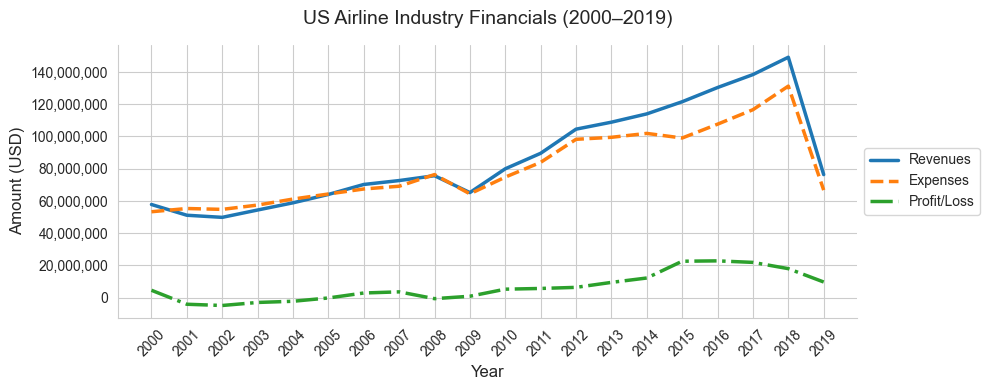

In [9]:
# Industry-Wide Trends
industry_trends = df.groupby("YEAR")[["OVERALL_OP_REVENUES", "OVERALL_OP_EXPENSES", "OVERALL_OP_PROFIT_LOSS"]].sum().reset_index()
plt.figure(figsize=(10, 4))
sns.set_style("whitegrid")  
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
sns.lineplot(data=industry_trends, x="YEAR", y="OVERALL_OP_REVENUES", label="Revenues", color="#1f77b4", linewidth=2.5)
sns.lineplot(data=industry_trends, x="YEAR", y="OVERALL_OP_EXPENSES", label="Expenses", color="#ff7f0e", linewidth=2.5, linestyle="--")
sns.lineplot(data=industry_trends, x="YEAR", y="OVERALL_OP_PROFIT_LOSS", label="Profit/Loss", color="#2ca02c", linewidth=2.5, linestyle="-.")
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(industry_trends["YEAR"], rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.title("US Airline Industry Financials (2000–2019)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (USD)", fontsize=12)

plt.legend(fontsize=10, loc="center left", bbox_to_anchor=(1, 0.5))
sns.despine()
plt.tight_layout()
plt.show()

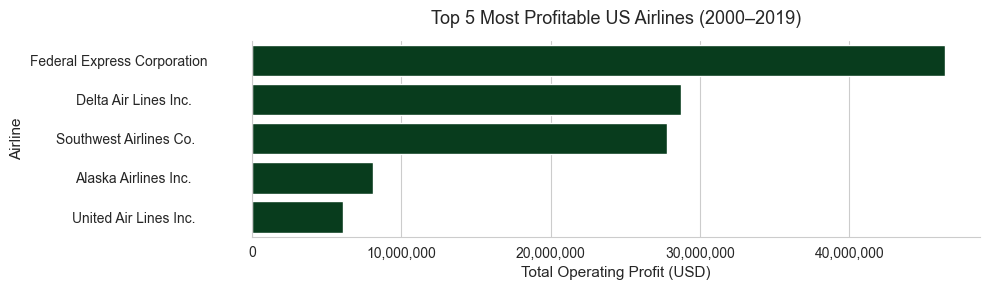

In [10]:
# Airline top 5 most profitable airlines
carrier_profit = df.groupby("UNIQUE_CARRIER_NAME")["OVERALL_OP_PROFIT_LOSS"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 3))
ax = sns.barplot(
    data=carrier_profit.head(5),
    x="OVERALL_OP_PROFIT_LOSS",
    y="UNIQUE_CARRIER_NAME",
    palette="Greens_r",
    hue=0.8, legend=False
)
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.set_title("Top 5 Most Profitable US Airlines (2000–2019)", fontsize=13, pad=12)
ax.set_xlabel("Total Operating Profit (USD)", fontsize=11)
ax.set_ylabel("Airline", fontsize=11)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()


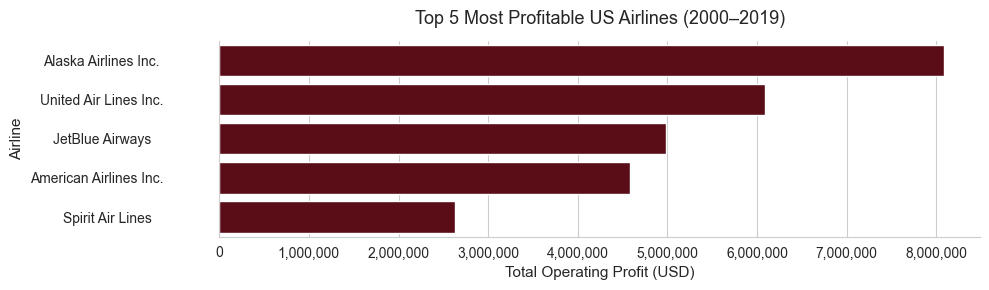

In [11]:
# Bottom 5 unprofitable airlines
carrier_profit = df.groupby("UNIQUE_CARRIER_NAME")["OVERALL_OP_PROFIT_LOSS"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 3))
ax = sns.barplot(
    data=carrier_profit.tail(5),
    x="OVERALL_OP_PROFIT_LOSS",
    y="UNIQUE_CARRIER_NAME",
    palette="Reds_r",
    hue=0.8, legend=False
)
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)
ax.set_title("Top 5 Most Profitable US Airlines (2000–2019)", fontsize=13, pad=12)
ax.set_xlabel("Total Operating Profit (USD)", fontsize=11)
ax.set_ylabel("Airline", fontsize=11)
ax.tick_params(axis='y', labelsize=10)
ax.tick_params(axis='x', labelsize=10)
sns.despine()
plt.tight_layout()
plt.show()

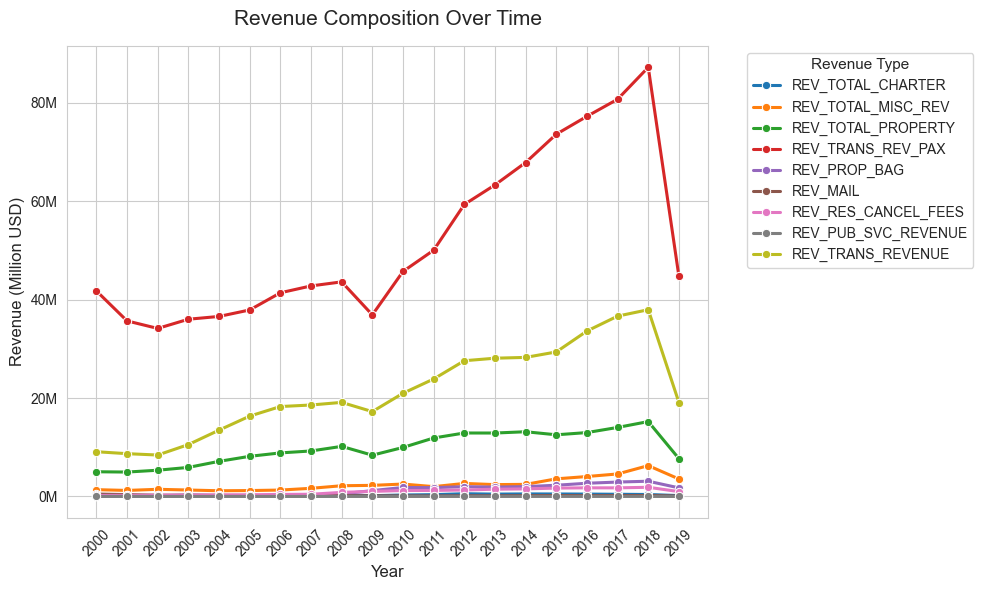

In [12]:
# Revenue Composition Over Time
rev_columns = [
    "REV_TOTAL_CHARTER", "REV_TOTAL_MISC_REV", "REV_TOTAL_PROPERTY", "REV_TRANS_REV_PAX", 
    "REV_PROP_BAG", "REV_MAIL", "REV_RES_CANCEL_FEES", "REV_PUB_SVC_REVENUE", "REV_TRANS_REVENUE"
]
rev_long = df.groupby("YEAR")[rev_columns].sum().reset_index().melt(id_vars="YEAR", var_name="REVENUE_TYPE", value_name="REVENUE")

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", n_colors=len(rev_columns))
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=rev_long, 
    x="YEAR", 
    y="REVENUE", 
    hue="REVENUE_TYPE", 
    palette=palette, 
    linewidth=2.2, 
    marker="o"
)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title("Revenue Composition Over Time", fontsize=15, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (Million USD)", fontsize=12)
plt.legend(title="Revenue Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.xticks(rev_long["YEAR"].unique(), rotation=45)
plt.tight_layout()
plt.show()

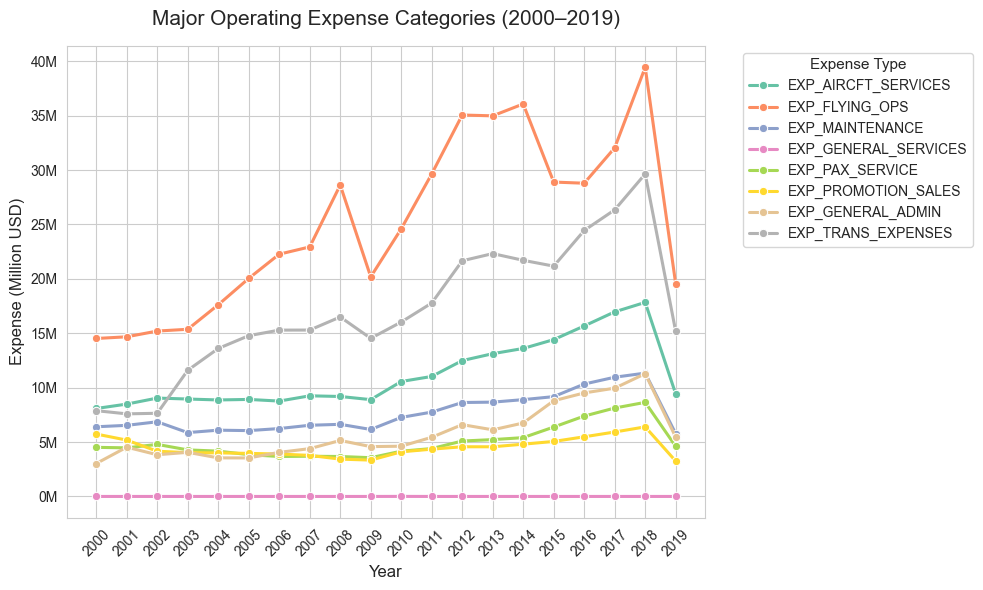

In [13]:
# Cost Drivers Over Time
exp_columns = [
    "EXP_AIRCFT_SERVICES", "EXP_FLYING_OPS", "EXP_MAINTENANCE", "EXP_GENERAL_SERVICES",
    "EXP_PAX_SERVICE", "EXP_PROMOTION_SALES", "EXP_GENERAL_ADMIN", "EXP_TRANS_EXPENSES"
]
exp_long = df.groupby("YEAR")[exp_columns].sum().reset_index().melt(id_vars="YEAR", var_name="EXPENSE_TYPE", value_name="EXPENSE")
plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2", n_colors=len(exp_columns))
sns.set_style("whitegrid")
ax = sns.lineplot(
    data=exp_long,
    x="YEAR",
    y="EXPENSE",
    hue="EXPENSE_TYPE",
    palette=palette,
    linewidth=2.2,
    marker="o"
)
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.title("Major Operating Expense Categories (2000–2019)", fontsize=15, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Expense (Million USD)", fontsize=12)
plt.legend(title="Expense Type", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=11)
plt.xticks(exp_long["YEAR"].unique(), rotation=45)
plt.tight_layout()
plt.show()

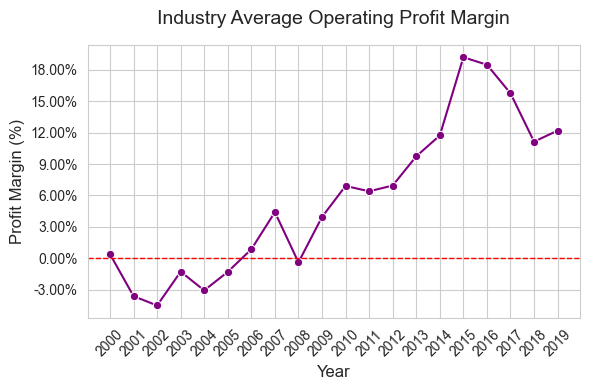

In [14]:
# Profit Margin Analysis
df["PROFIT_MARGIN"] = df["OVERALL_OP_PROFIT_LOSS"] / df["OVERALL_OP_REVENUES"]
margin_trend = df.groupby("YEAR")["PROFIT_MARGIN"].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=margin_trend, x="YEAR", y="PROFIT_MARGIN", marker="o", color="purple")
plt.title("Industry Average Operating Profit Margin", fontsize=14, pad=15)
plt.ylabel("Profit Margin (%)", fontsize=12)    
plt.xlabel("Year", fontsize=12)
plt.xticks(margin_trend["YEAR"], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2%}'))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10, integer=True))
plt.grid(True)
plt.tight_layout()
plt.show()

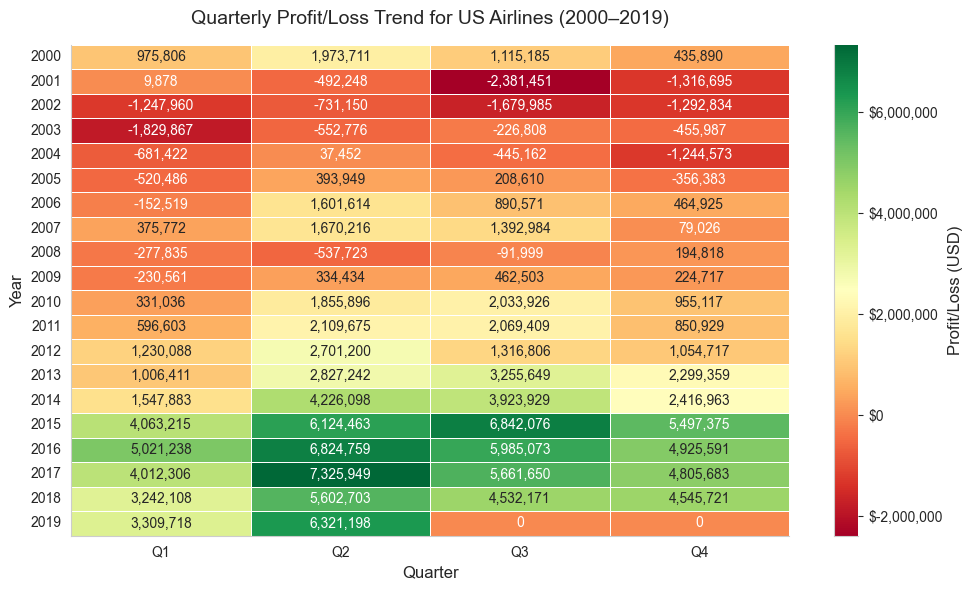

In [15]:
# Quarterly Performance Heatmap over the years
quarterly_performance = df.groupby(["YEAR", "QUARTER"])[["OVERALL_OP_REVENUES", "OVERALL_OP_EXPENSES", "OVERALL_OP_PROFIT_LOSS"]].sum().reset_index()
quarterly_performance_pivot = quarterly_performance.pivot_table(
    index="YEAR", 
    columns="QUARTER", 
    values="OVERALL_OP_PROFIT_LOSS", 
    aggfunc='sum',
    fill_value=0 
).reset_index()

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid") 

# Create heatmap
ax = sns.heatmap(
    quarterly_performance_pivot.drop(columns="YEAR"),  # Drop YEAR for plotting
    annot=True, 
    fmt=",.0f",  # Comma-separated thousands
    cmap="RdYlGn",  # Red-Yellow-Green for profit/loss
    cbar_kws={'label': 'Profit/Loss (USD)', 'format': ticker.FuncFormatter(lambda x, _: f'${x:,.0f}')},
    annot_kws={"size": 10},  # Increase annotation font size
    linewidths=0.5,  # Add subtle gridlines
    linecolor="white"
)

# Customizing colorbar
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)
colorbar.ax.set_ylabel('Profit/Loss (USD)', fontsize=12)

# Setting the Ticks, title and labels
plt.title("Quarterly Profit/Loss Trend for US Airlines (2000–2019)", fontsize=14, pad=15)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(ticks=np.arange(4) + 0.5, labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=10)
plt.yticks(ticks=np.arange(len(quarterly_performance_pivot)) + 0.5, 
          labels=quarterly_performance_pivot["YEAR"], 
          rotation=0, 
          fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

#### Scenario 2: Carrier - American Airlines Inc.

In [16]:
# Filter for American Airlines Inc. for the last 10 years
df['UNIQUE_CARRIER_NAME'] = df['UNIQUE_CARRIER_NAME'].str.strip().str.upper()
df_aa = df[(df['UNIQUE_CARRIER_NAME'] == 'AMERICAN AIRLINES INC.') & (df['YEAR'] >= 2010)]
df_aa.head(10)

,UNIQUE_CARRIER_NAME,YEAR,QUARTER,OVERALL_OP_EXPENSES,OVERALL_OP_PROFIT_LOSS,OVERALL_OP_REVENUES,REV_CHARTER_PAX,REV_CHARTER_PROP,REV_MAIL,REV_MISC_OP_REV,...,REV_TRANS_REV_PAX,EXP_AIRCFT_SERVICES,EXP_FLYING_OPS,EXP_GENERAL_ADMIN,EXP_GENERAL_SERVICES,EXP_MAINTENANCE,EXP_PAX_SERVICE,EXP_PROMOTION_SALES,EXP_TRANS_EXPENSES,PROFIT_MARGIN
9,AMERICAN AIRLINES INC.,2013,4,3528291.0,48382.0,3576673.0,3561.0,0,1429.0,10568.0,...,2740936.0,451234.0,1459374.0,328286.0,0.0,320157.0,221568.0,199516.0,442676.0,0.013527
11,AMERICAN AIRLINES INC.,2012,1,3646560.0,-157436.0,3489124.0,801.0,0,838.0,11364.0,...,2684268.0,483185.0,1480841.0,331274.0,0.0,352305.0,242245.0,203408.0,441013.0,-0.045122
21,AMERICAN AIRLINES INC.,2011,4,4047100.0,-604790.0,3442310.0,4607.0,0,1163.0,10986.0,...,2614939.0,528963.0,1447766.0,697347.0,0.0,365595.0,252007.0,197518.0,440367.0,-0.175693
37,AMERICAN AIRLINES INC.,2011,1,3515245.0,-334120.0,3181125.0,1522.0,0,8043.0,10033.0,...,2423857.0,549317.0,1388864.0,256125.0,0.0,339214.0,254476.0,225152.0,375660.0,-0.105032
50,AMERICAN AIRLINES INC.,2010,1,3287636.0,-249135.0,3038501.0,982.0,0,9259.0,11090.0,...,2339479.0,542009.0,1187320.0,277371.0,0.0,375621.0,243174.0,207697.0,331799.0,-0.081993
59,AMERICAN AIRLINES INC.,2012,3,3728482.0,-161533.0,3566949.0,2421.0,0,933.0,10902.0,...,2766934.0,462725.0,1453422.0,482661.0,0.0,326730.0,245145.0,209464.0,445818.0,-0.045286
79,AMERICAN AIRLINES INC.,2013,1,3544094.0,-47526.0,3496568.0,986.0,0,1116.0,10009.0,...,2693800.0,473603.0,1490706.0,231297.0,0.0,348649.0,241171.0,216678.0,444674.0,-0.013592
87,AMERICAN AIRLINES INC.,2012,2,3761639.0,34220.0,3795859.0,221.0,0,773.0,12136.0,...,2897719.0,477944.0,1494425.0,423787.0,0.0,352107.0,244222.0,206340.0,450893.0,0.009015
106,AMERICAN AIRLINES INC.,2011,3,3602429.0,-18001.0,3584428.0,1803.0,0,5762.0,13605.0,...,2756006.0,518593.0,1497591.0,222565.0,0.0,364064.0,241418.0,195116.0,439904.0,-0.005022
210,AMERICAN AIRLINES INC.,2014,1,3363381.0,347039.0,3710420.0,773.0,0,1064.0,10400.0,...,2858676.0,473040.0,1497145.0,61023.0,0.0,355818.0,224914.0,217541.0,432459.0,0.093531


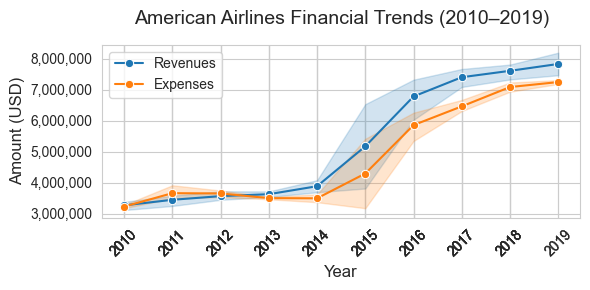

In [17]:
# Revenue and Expense Trends for American Airlines
plt.figure(figsize=(6, 3))
sns.lineplot(data=df_aa, x="YEAR", y="OVERALL_OP_REVENUES", label="Revenues", marker="o")
sns.lineplot(data=df_aa, x="YEAR", y="OVERALL_OP_EXPENSES", label="Expenses", marker="o")
plt.title("American Airlines Financial Trends (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Amount (USD)", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.legend( fontsize=10)
plt.xticks(df_aa["YEAR"], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

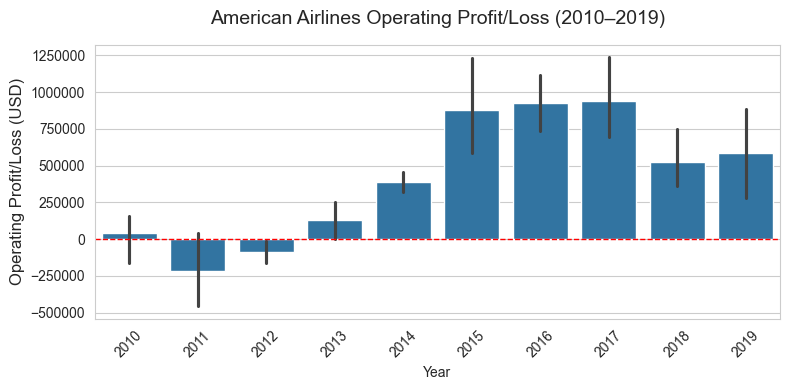

In [18]:
# Profitability Analysis for American Airlines
plt.figure(figsize=(8, 4))
sns.barplot(data=df_aa, x="YEAR", y="OVERALL_OP_PROFIT_LOSS")
plt.title("American Airlines Operating Profit/Loss (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Operating Profit/Loss (USD)", fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, wrap=True)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

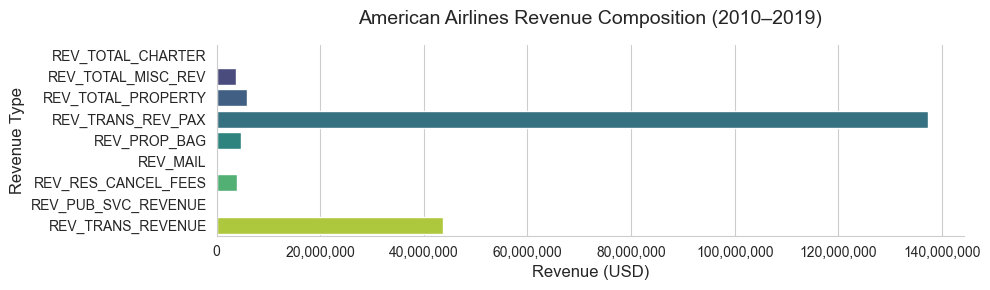

In [19]:
# Revenue Composition for American Airlines
rev_aa = df_aa[rev_columns].sum().reset_index()
rev_aa.columns = ["REVENUE_TYPE", "REVENUE"]
plt.figure(figsize=(10, 3))
sns.barplot(data=rev_aa, x="REVENUE", y="REVENUE_TYPE", palette="viridis", hue="REVENUE_TYPE", legend=False)
plt.title("American Airlines Revenue Composition (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Revenue (USD)", fontsize=12)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, wrap=True)
plt.ylabel("Revenue Type", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

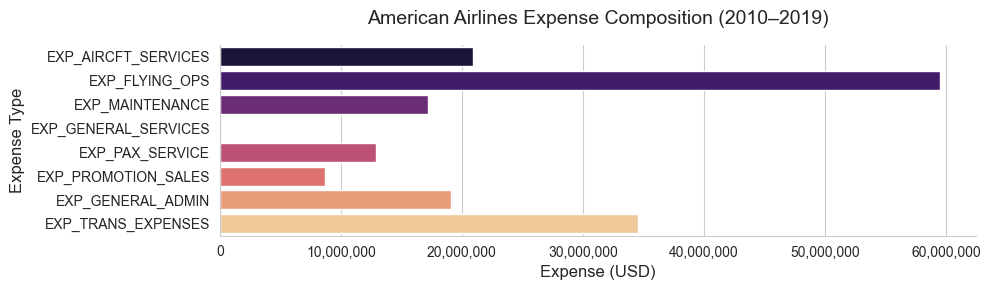

In [20]:
# Expense Composition for American Airlines
exp_aa = df_aa[exp_columns].sum().reset_index()
exp_aa.columns = ["EXPENSE_TYPE", "EXPENSE"]
plt.figure(figsize=(10, 3))
sns.barplot(data=exp_aa, x="EXPENSE", y="EXPENSE_TYPE", palette="magma", hue="EXPENSE_TYPE", legend=False)
plt.title("American Airlines Expense Composition (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Expense (USD)", fontsize=12)
plt.gca().xaxis.set_major_formatter(formatter)  # Apply custom formatter
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, wrap=True)
plt.ylabel("Expense Type",  fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

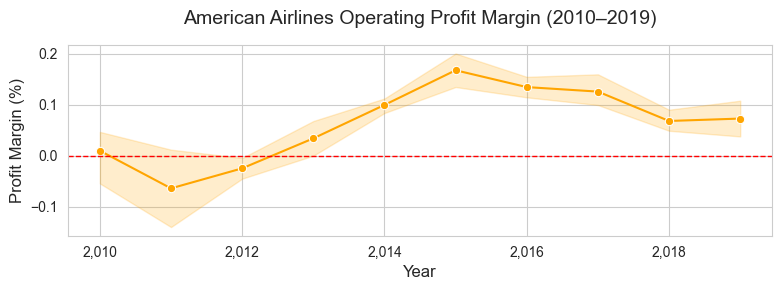

In [21]:
# Profit Margin for American Airlines
plt.figure(figsize=(8, 3))
sns.lineplot(data=df_aa, x="YEAR", y="PROFIT_MARGIN", marker="o", color="orange")
plt.title("American Airlines Operating Profit Margin (2010–2019)",  fontsize=14, pad=15)
plt.xlabel("Year",  fontsize=12)
plt.ylabel("Profit Margin (%)", fontsize=12)    
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, wrap=True)
plt.grid(True)
plt.tight_layout()
plt.show()

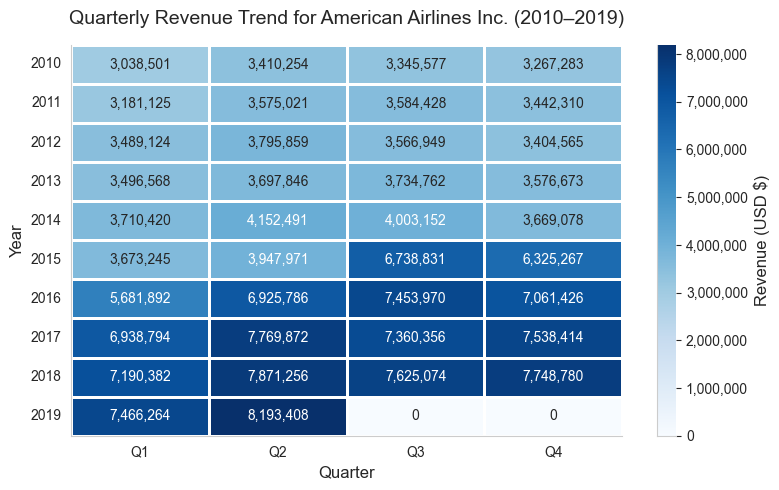

In [24]:
# Calculating quarterly revenue and profit/loss trend for American Airlines Inc. for the years 2010 to 2019
# Create a pivot table for quarterly revenue
df_aa_quarterly = df_aa.groupby(['YEAR', 'QUARTER'])[['OVERALL_OP_REVENUES', 'OVERALL_OP_PROFIT_LOSS']].sum().reset_index()
df_aa_quarterly_pivot = df_aa_quarterly.pivot(index='YEAR', columns='QUARTER', values='OVERALL_OP_REVENUES').fillna(0)

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.heatmap(
    df_aa_quarterly_pivot, 
    annot=True, 
    fmt=",.0f",
    cmap="Blues",
    cbar_kws={'label': 'Revenue (USD)', 'format': ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')},
    annot_kws={"size": 10}, 
    linewidths=1, 
    linecolor="white"
)

# Customizing colorbar, ticks, title and labels
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)
colorbar.ax.set_ylabel('Revenue (USD $)', fontsize=12)
plt.title("Quarterly Revenue Trend for American Airlines Inc. (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(ticks=np.arange(4) + 0.5, labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=10)
plt.yticks(ticks=np.arange(len(df_aa_quarterly_pivot)) + 0.5, 
           labels=df_aa_quarterly_pivot.index, 
           rotation=0, 
           fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

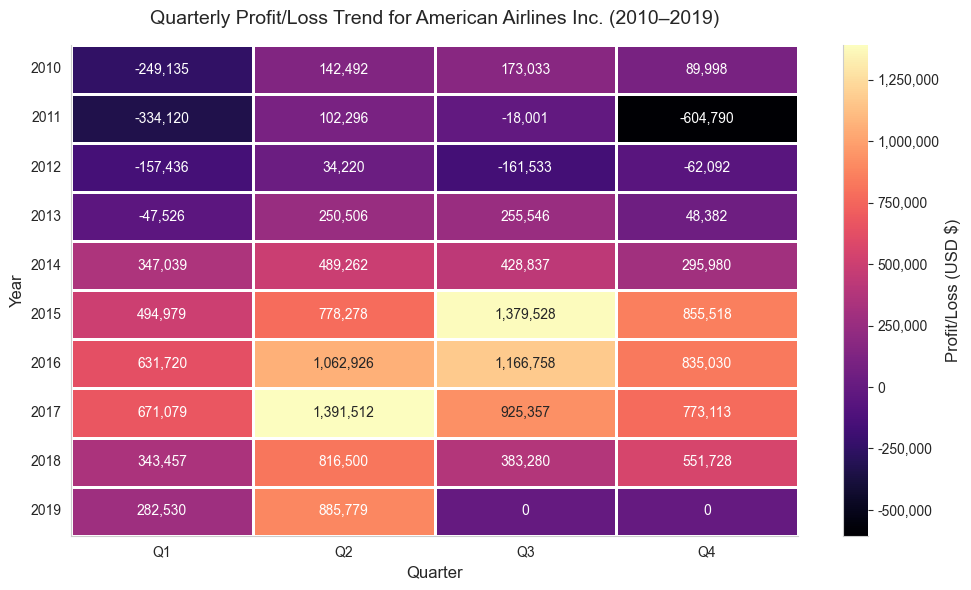

In [23]:
# Calculating quarterly revenue and profit/loss trend for American Airlines Inc. for the years 2010 to 2019
# Create a pivot table for quarterly revenue
df_aa_quarterly = df_aa.groupby(['YEAR', 'QUARTER'])[['OVERALL_OP_REVENUES', 'OVERALL_OP_PROFIT_LOSS']].sum().reset_index()
df_aa_quarterly_pivot = df_aa_quarterly.pivot(index='YEAR', columns='QUARTER', values='OVERALL_OP_PROFIT_LOSS').fillna(0)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.heatmap(
    df_aa_quarterly_pivot, 
    annot=True, 
    fmt=",.0f",
    cmap="magma",
    cbar_kws={'label': 'Revenue (USD)', 'format': ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')},
    annot_kws={"size": 10}, 
    linewidths=1, 
    linecolor="white"
)

# Customizing colorbar, ticks, title and labels
colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=10)
colorbar.ax.set_ylabel('Profit/Loss (USD $)', fontsize=12)
plt.title("Quarterly Profit/Loss Trend for American Airlines Inc. (2010–2019)", fontsize=14, pad=15)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.xticks(ticks=np.arange(4) + 0.5, labels=['Q1', 'Q2', 'Q3', 'Q4'], fontsize=10)
plt.yticks(ticks=np.arange(len(df_aa_quarterly_pivot)) + 0.5, 
           labels=df_aa_quarterly_pivot.index, 
           rotation=0, 
           fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

### Insights Summary

- **Industry Trends (2000–2019):**
    - The US airline industry saw overall growth in revenues and expenses, with notable fluctuations during 2008–2009.
    - Profit margins improved significantly after 2013, peaking around 2015–2016, indicating improved operational efficiency or favorable market conditions.

- **American Airlines (2010–2019):**
    - Revenues and expenses for American Airlines both increased over the decade and positive operating profits after 2013/14.
    - Revenue composition is higher from the passenger revenue, but ancillary revenues (baggage fees, reservation change fees, etc.) also contribute significantly.
    - Major expense are from the categories: flying operations, maintenance, and general administration, with flying operations being the largest cost driver.
    - Quarterly analysis reveals seasonal patterns, with Q2 and Q3 generally showing higher revenues and profits, likely due to increased travel demand.

- **Data Quality:**
    - The dataset is clean, with no missing values or duplicates, ensuring reliability of the analysis.

- **Overall:**  
    American Airlines' financial performance closely mirrors broader industry trends, with improved profitability and margins in the latter half of the decade, 
    driven by both revenue growth and cost management. Ancillary revenues and seasonal effects are important factors in the airline's financial outcomes.